## Initialize

In [2]:
getwd()

[1] "/home/steinfej/code/21_metabolomics_analysis/Round1/Figures"

In [3]:
#library(Rmisc)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)

Warning message:
“package ‘tidyverse’ was built under R version 4.0.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘purrr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘arrow’ was built under R version 4.0.3”

Attaching package: ‘arrow’


The following object is masked from ‘p

In [4]:
if (grepl("sc", Sys.info()[["nodename"]], fixed=TRUE)) {
    base_path = "/sc-projects/sc-proj-ukb-cvd"
} else {
    base_path = "/data/analysis/ag-reils/ag-reils-shared/cardioRS"}
print(base_path)

dataset_name = "210714_metabolomics"
path = "/data/analysis/ag-reils/steinfej/code/umbrella/pre/ukbb"
data_path = glue("{base_path}/data")
dataset_path = glue("{data_path}/3_datasets_post/{dataset_name}")

project_label="21_metabolomics_multitask"
project_path = glue("{base_path}/results/projects/{project_label}")
figures_path = glue("{project_path}/figures")
data_results_path = glue("{project_path}/data")

[1] "/sc-projects/sc-proj-ukb-cvd"


## Load data

In [5]:
list.dirs(path = project_path, full.names = TRUE, recursive = TRUE)

[1] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask"                                         
[2] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask/data"                                    
[3] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask/figures"                                 
[4] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask/figures/.ipynb_checkpoints"              
[5] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask/figures/UMAP"                            
[6] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask/figures/UMAP/basics"                     
[7] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask/figures/UMAP/basics/.ipynb_checkpoints"  
[8] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask/figures/UMAP/endpoint"                   
[9] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask/figures/UMAP/endpoint/.ipynb_checkpoints"

In [6]:
run = "220126"

In [7]:
DSM = "MultiTaskSurvivalTraining"
data = arrow::read_feather(glue("{dataset_path}/data_merged.feather")) 
data_description = arrow::read_feather(glue("{dataset_path}/description_merged.feather"))
predictions = arrow::read_feather(glue("{data_results_path}/predictions_{run}_metabolomics.feather")) 

In [8]:
data_events = data %>% select(eid, ends_with("event"), ends_with("event_time")) %>% 
    pivot_longer(-eid, names_to=c("endpoint", "type"), values_to="value", names_pattern="(.*)(event_time|event)") %>% 
    mutate(endpoint = stringr::str_sub(endpoint, end=-2)) %>% pivot_wider(names_from="type", values_from="value")

In [9]:
predictions_tte = predictions %>% left_join(data_events, by=c("endpoint", "eid"))

In [10]:
library(ggthemes)
endpoint_map = c(
    'M_MACE'='MACE',
    'M_all_cause_dementia'='Dementia',
    'M_type_2_diabetes'='T2 Diabetes',
    'M_liver_disease'='Liver Disease',
    'M_renal_disease'='Renal Disease',
    'M_atrial_fibrillation'='Atrial Fibrillation',
    'M_heart_failure'= 'Heart Failure',
    'M_coronary_heart_disease'='CHD',
    'M_venous_thrombosis'='Ven. Thrombosis',
    'M_cerebral_stroke'='Cerebral Stroke',
    'M_abdominal_aortic_aneurysm'='AAA',
    'M_peripheral_arterial_disease'='PAD',
    "M_chronic_obstructuve_pulmonary_disease" = "COPD",
    "M_asthma" = "Asthma",
    'M_parkinsons_disease' = "Parkinson's",    
    "M_lung_cancer" = "Lung Cancer",
    "M_non_melanoma_skin_cancer" = "Skin Cancer",
    "M_colon_cancer"= "Colon Cancer",
    "M_rectal_cancer" = "Rectal Cancer",
    "M_prostate_cancer"= "Prostate Cancer",
    "M_breast_cancer" = "Breast Cancer",
    'M_cataracts' = "Cataracts", 
    'M_glaucoma' = "Glaucoma",
    'M_fractures' = "Fractures"
)

endpoint_order = c("M_MACE", "M_coronary_heart_disease", "M_cerebral_stroke", "M_all_cause_dementia", "M_heart_failure", "M_atrial_fibrillation",
                   "M_type_2_diabetes", "M_liver_disease", "M_renal_disease", "M_peripheral_arterial_disease", "M_venous_thrombosis",  "M_abdominal_aortic_aneurysm",
                   "M_chronic_obstructuve_pulmonary_disease", "M_asthma", 'M_parkinsons_disease', 'M_cataracts', 'M_glaucoma', 'M_fractures',
                    "M_lung_cancer","M_non_melanoma_skin_cancer","M_colon_cancer","M_rectal_cancer","M_prostate_cancer","M_breast_cancer"
                   
)

Warning message:
“package ‘ggthemes’ was built under R version 4.0.3”


In [71]:
library("jsonlite")
colors_path = "colors.json"
colors_dict = read_json(colors_path)

color_map <- c('COX_Age+Sex' = colors_dict$pastel$grey$light, 
               'DS_Metabolomics' = "#4F8EC1",  #colors_dict$pastel$orange$dark,
               'COX_ASCVD' = colors_dict$pastel$grey$mid, 
               'COX_PANEL' = colors_dict$pastel$grey$dark, 
               'DS_Age+Sex+Metabolomics' = "#53dd6c",#colors_dict$pastel$orange$mid,
               'DS_ASCVD+Metabolomics' = "#d8315b",#colors_dict$pastel$red$mid,
               #'DS_QRISK3+Metabolomics' = colors_dict$pastel$red$mid,
               'DS_PANELnoblood+Metabolomics' = "forestgreen",
               'DS_PANEL+Metabolomics' = "#1e1b18" #colors_dict$pastel$red$dark
      )

type_map <- c('COX_Age+Sex' = "dashed", 
               'DS_Metabolomics' = "solid",  #colors_dict$pastel$orange$dark,
               'COX_ASCVD' = "dashed", 
               'COX_PANEL' = "dashed", 
               'DS_Age+Sex+Metabolomics' = "solid",#colors_dict$pastel$orange$mid,
               'DS_ASCVD+Metabolomics' = "solid",#colors_dict$pastel$red$mid,
               'DS_PANEL+Metabolomics' = "solid", #colors_dict$pastel$red$dark
                'DS_PANELnoblood+Metabolomics' = "solid",
              "Treat All" = "solid",
              "Treat None" = "solid"
      )

size_map <- c('COX_Age+Sex' = 0.25, 
               'DS_Metabolomics' = 0.25,  #colors_dict$pastel$orange$dark,
               'COX_ASCVD' = 0.25, 
               'COX_PANEL' = 0.25, 
               'DS_Age+Sex+Metabolomics' = 0.25,#colors_dict$pastel$orange$mid,
               'DS_ASCVD+Metabolomics' = 0.25,#colors_dict$pastel$red$mid,
               'DS_PANEL+Metabolomics' = 0.25, #colors_dict$pastel$red$dark
                'DS_PANELnoblood+Metabolomics' = 0.25,
              "Treat All" = 0.25,
              "Treat None" = 0.25
      )

In [12]:
library(foreach)

Warning message:
“package ‘foreach’ was built under R version 4.0.5”

Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when




In [13]:
library(doParallel)

Warning message:
“package ‘doParallel’ was built under R version 4.0.5”
Loading required package: iterators

Warning message:
“package ‘iterators’ was built under R version 4.0.5”
Loading required package: parallel



In [14]:
scores_dca = c("DS_Metabolomics",
    "COX_Age+Sex",
    "DS_Age+Sex+Metabolomics" ,
    "COX_ASCVD",
    "DS_ASCVD+Metabolomics",
    "COX_PANEL",
    "DS_PANEL+Metabolomics",
     "DS_PANELjustbloodcount+Metabolomics",          
    "DS_PANELnoblood+Metabolomics"  
              )

In [44]:
calculate_dca = function(endpoint){
    dca_temp = predictions_tte %>% filter(endpoint==!!endpoint) %>% 
        mutate(score=glue("{module}_{features}")) %>% 
        select(eid, score, Ft_10, event, event_time) %>% 
        filter(score %in% scores_dca) %>%
        pivot_wider(names_from="score", values_from="Ft_10") %>% 
        distinct()
    
    print(glue("{endpoint} n={nrow(dca_temp)}"))
    flush.console()
    
    dca_endpoint = dca(
        Surv(event_time, event) ~ DS_Metabolomics + `COX_Age+Sex` + `DS_Age+Sex+Metabolomics` + COX_ASCVD + `DS_ASCVD+Metabolomics` + COX_PANEL + `DS_PANEL+Metabolomics` + `DS_PANELjustbloodcount+Metabolomics` + `DS_PANELnoblood+Metabolomics`, 
        data = dca_temp,
        time = 10,
        thresholds = seq(0, 0.5, by=0.001)
           )$dca
    return(dca_endpoint %>% mutate(st_net_benefit = net_benefit/prevalence))
}

In [45]:
registerDoParallel(length(endpoint_order))

In [46]:
library(dcurves)
dca_data = foreach(key=endpoint_order, endpoint=endpoint_order) %dopar% {
    calculate_dca(endpoint)
}

In [47]:
names(dca_data) = endpoint_order
for (endpoint in endpoint_order){
    dca_data[[endpoint]]["endpoint"] = endpoint
    }

In [48]:
dca_data_agg = bind_rows(dca_data)

In [49]:
base_size = 8
title_size = 10
facet_size = 10
geom_text_size=3
library(ggplot2); 
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major.y = element_line()))

## AgeSex + Metabolomics vs PANEL

In [50]:
endpoints_plot = c("M_MACE", "M_coronary_heart_disease", "M_cerebral_stroke", "M_all_cause_dementia", "M_heart_failure", "M_atrial_fibrillation",
                   "M_type_2_diabetes", "M_liver_disease", "M_renal_disease", "M_peripheral_arterial_disease", "M_venous_thrombosis",  "M_abdominal_aortic_aneurysm",
                   "M_chronic_obstructuve_pulmonary_disease", "M_asthma", 'M_parkinsons_disease', 'M_cataracts', 'M_glaucoma', 'M_fractures',
                    "M_lung_cancer","M_non_melanoma_skin_cancer","M_colon_cancer","M_rectal_cancer","M_prostate_cancer","M_breast_cancer"
)

scores_plot = c(
    "Treat All", 
    "Treat None",
    "COX_Age+Sex",
    "DS_Age+Sex+Metabolomics",
    "DS_PANELnoblood+Metabolomics",
    "COX_ASCVD",
    "COX_PANEL",
    "DS_PANEL+Metabolomics"
)

In [21]:
calibration_df = predictions_tte %>% 
    filter(endpoint %in% endpoints_plot) %>% 
    mutate(score = glue("{module}_{features}")) %>% 
    filter(score %in% scores_plot) %>% 
    select(eid, endpoint, score, Ft_10, event, event_time) %>%
    group_by(endpoint, score) %>% mutate(risk_group = ntile(Ft_10, 10), 
                                         event_10 = case_when(event == 0 ~ 0,
                                                              ((event==1)&(event_time>10)) ~ 0,
                                                              ((event==1)&(event_time<=10)) ~ 1
                                                             )
                                        ) %>% 
    group_by(endpoint, score, risk_group) %>% 
    mutate(mean_risk = mean(Ft_10), mean_events = mean(event_10)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_plot))

In [99]:
plots_cal = c()
for (endpoint in endpoints_plot){
    temp = calibration_df %>% filter(as.character(endpoint) == !!endpoint)
    endpoint_label = endpoint_map[[endpoint]]
    plots_cal[[endpoint]] = 
        ggplot(temp, aes(x=mean_risk*100, y=mean_events*100, color=score, size=score, linetype=score)) + 
        geom_point() + 
        geom_line()+
        labs(title="Calibration", x="Predicted Risk [%]", y="Event Rate [%]") +
        geom_abline(intercept=0, slope=1, color="red", alpha=0.7)+    
        scale_color_manual(values=color_map)+
        scale_linetype_manual(values=type_map)+
        scale_size_manual(values=size_map)+
        coord_cartesian(xlim=c(0, NA), ylim=c(0, NA))+
        theme(legend.position="none", axis.title = element_text())
    #print(plotsA[[endpoint]])
    #flush.console()
    }

In [22]:
library(lemon)


Attaching package: ‘lemon’


The following object is masked from ‘package:purrr’:

    %||%


The following objects are masked from ‘package:ggplot2’:

    CoordCartesian, element_render




In [101]:
plot_width=5; plot_height=5; plot_dpi=320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_dpi)

scores_plot = c(
    "Treat All", 
    "Treat None",
    "COX_Age+Sex",
    "DS_Age+Sex+Metabolomics",
    "DS_PANELnoblood+Metabolomics",
    "COX_ASCVD",
    "COX_PANEL"
   # "DS_PANEL+Metabolomics"
)

plotsA = c()
for (endpoint in endpoints_plot){
    temp = dca_data[[endpoint]] %>% mutate(st_net_benefit = st_net_benefit*100) %>% mutate(st_net_benefit = case_when((label == "COX_Age+Sex")&is.na(st_net_benefit) ~ 0, TRUE ~ st_net_benefit))
    if (min((temp %>% filter(label=="DS_PANEL+Metabolomics"))$st_net_benefit, na.rm=TRUE)>0){
        threshold_max = (temp %>% filter(label=="DS_PANEL+Metabolomics") %>% slice_min(st_net_benefit))$threshold
        }
    else{
        threshold_max = min((temp %>% filter(label=="DS_PANEL+Metabolomics") %>% filter(st_net_benefit<0))$threshold, na.rm=TRUE)
        }
    endpoint_label = endpoint_map[[endpoint]]
        temp_plot = temp %>% filter(label %in% scores_plot)
    temp_plot_wide = temp_plot %>%  select(threshold, label, st_net_benefit) %>% pivot_wider(names_from="label", values_from="st_net_benefit")
    plotsA[[endpoint]] = 
        ggplot(temp_plot)+
          labs(title="Age+Sex vs. Age+Sex+MET", x="Threshold Probability [%]", y="Standardized Net Benefit [%]")+
          geom_line(data=temp_plot, mapping=aes(x=threshold, y=st_net_benefit, color=label, linetype=label, size=label)) + 
        geom_ribbon(data=temp_plot_wide, mapping=aes(x=threshold, ymin=`COX_Age+Sex`, ymax=`DS_Age+Sex+Metabolomics`), fill=colors_dict$pastel$green$mid, alpha=0.1, colour = NA)+
        geom_ribbon(data=temp_plot_wide, mapping=aes(x=threshold, ymin=`DS_Age+Sex+Metabolomics`, ymax=`DS_PANELnoblood+Metabolomics`), fill=colors_dict$pastel$green$dark, alpha=0.2, colour = NA)+
          coord_cartesian(xlim=c(0, threshold_max), ylim=c(0, max(temp$st_net_benefit, na.rm=TRUE)))+
          scale_x_continuous(labels = function(x){x*100})+#labels = scales::percent_format(accuracy=1))+
          scale_color_manual(values=color_map)+
          scale_linetype_manual(values=type_map)+
    scale_size_manual(values=size_map)+
        theme(legend.position="none")
    #print(plotsA[[endpoint]])
    flush.console()
    }

In [102]:
plot_width=5; plot_height=5; plot_dpi=320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_dpi)

scores_plot = c(
    "Treat All", 
    "Treat None",
      "COX_Age+Sex",
      "COX_ASCVD",
    "COX_PANEL",
    #"DS_PANELnoblood+Metabolomics",
    "DS_PANEL+Metabolomics"
)

plotsB = c()
for (endpoint in endpoints_plot){
    temp = dca_data[[endpoint]] %>% mutate(st_net_benefit = st_net_benefit*100)
    if (min((temp %>% filter(label=="DS_PANEL+Metabolomics"))$st_net_benefit, na.rm=TRUE)>0){
        threshold_max = (temp %>% filter(label=="DS_PANEL+Metabolomics") %>% slice_min(st_net_benefit))$threshold
        }
    else{
        threshold_max = min((temp %>% filter(label=="DS_PANEL+Metabolomics") %>% filter(st_net_benefit<0))$threshold, na.rm=TRUE)
        }
    endpoint_label = endpoint_map[[endpoint]]
        temp_plot = temp %>% filter(label %in% scores_plot)
    temp_plot_wide = temp_plot %>%  select(threshold, label, st_net_benefit) %>% pivot_wider(names_from="label", values_from="st_net_benefit")
    plotsB[[endpoint]] = 
        ggplot(data=temp_plot) + 
             labs(title="PANEL vs. PANEL+MET", x="Threshold Probability [%]", y="Standardized Net Benefit [%]")+
            geom_line(data=temp_plot, mapping=aes(x=threshold, y=st_net_benefit, color=label, linetype=label, size=label)) + 
            geom_ribbon(data=temp_plot_wide, mapping=aes(x=threshold, ymin=COX_PANEL, ymax=`DS_PANEL+Metabolomics`), fill="black", alpha=0.1, colour = NA)+
            coord_cartesian(xlim=c(0, threshold_max), ylim=c(0, max(temp$st_net_benefit, na.rm=TRUE)))+
            scale_x_continuous(labels = function(x){x*100})+
            scale_color_manual(values=color_map)+
            scale_linetype_manual(values=type_map)+
            scale_size_manual(values=size_map)+
            theme(legend.position="none")
    #print(plotsB[[endpoint]])
    flush.console()
    }

Warning message:
“Removed 266 row(s) containing missing values (geom_path).”
Warning message:
“Removed 587 row(s) containing missing values (geom_path).”


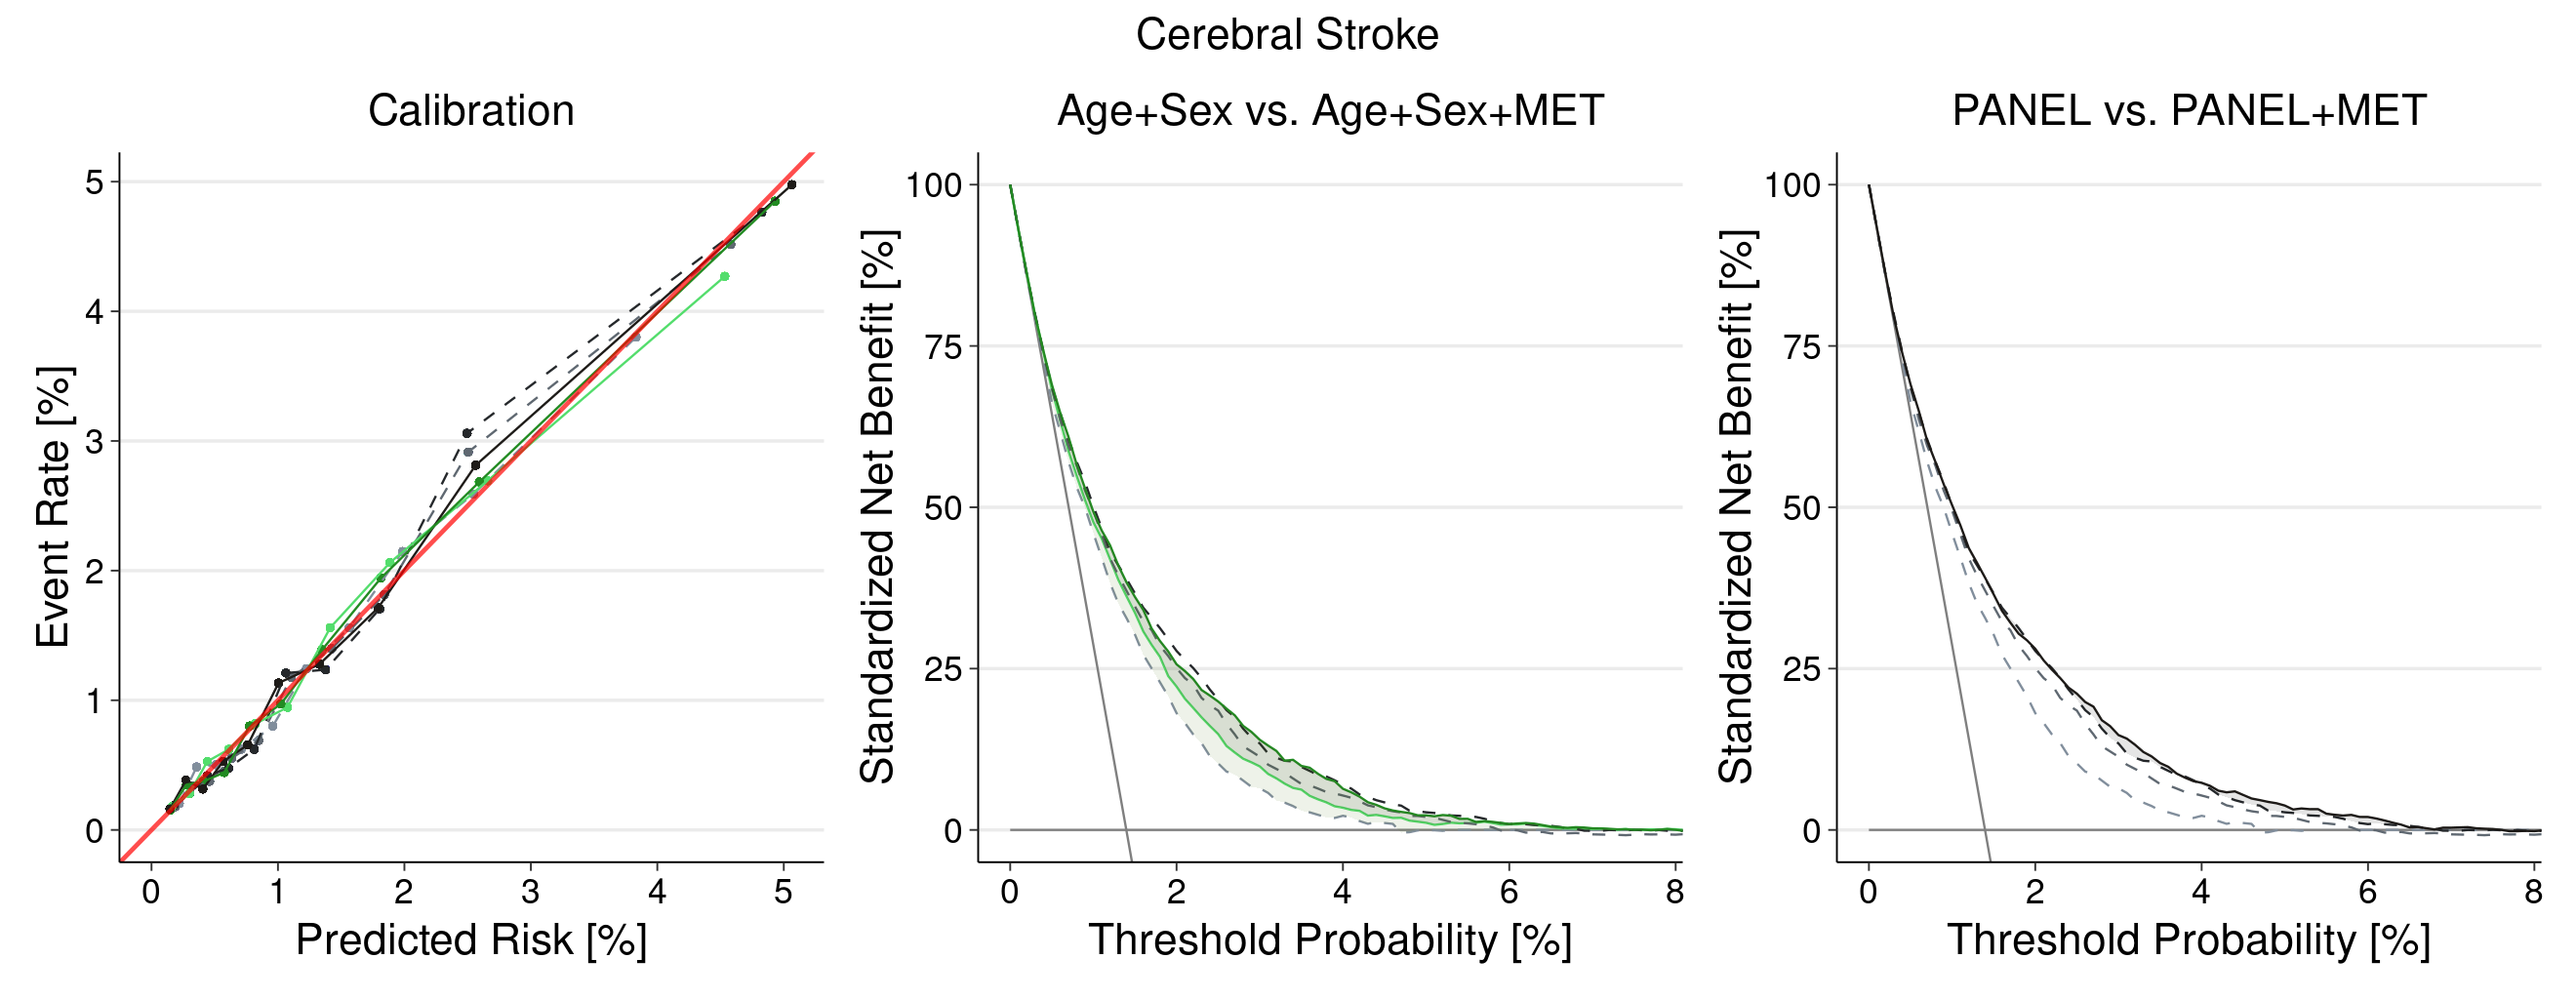

In [111]:
plot_width=8.25; plot_height=3.2; plot_dpi=320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_dpi)
endpoint_label = endpoint_map[[endpoint]]
temp = (plots_cal[[endpoint]]|plotsA[[endpoint]]|plotsB[[endpoint]]) & theme(plot.title=element_text(hjust=0.5))#(plots_cal[[endpoint]]|plotsA[[endpoint]]|plotsB[[endpoint]]) & theme(plot.title=element_text(hjust=0.5))
temp = temp + plot_annotation(title = endpoint_label)
temp

In [ ]:
plot_width=8.25; plot_height=3.2; plot_dpi=320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_dpi)


for (endpoint in endpoint_order){
    endpoint_label = endpoint_map[[endpoint]]
    plot_name = glue("ClinicalUtility_{endpoint_label}")
    
    temp = (plots_cal[[endpoint]]|plotsA[[endpoint]]|plotsB[[endpoint]]) & theme(plot.title=element_text(hjust=0.5))
    temp = temp + plot_annotation(title = endpoint_label)
    
    temp %>% ggsave(filename=glue("outputs/ClinicalUtility/{plot_name}.pdf"), device=cairo_pdf, width=plot_width, height=plot_height, dpi=plot_dpi)
    }

Warning message:
“Removed 15 row(s) containing missing values (geom_path).”
Warning message:
“Removed 266 row(s) containing missing values (geom_path).”
Warning message:
“Removed 587 row(s) containing missing values (geom_path).”
Warning message:
“Removed 152 row(s) containing missing values (geom_path).”
Warning message:
“Removed 242 row(s) containing missing values (geom_path).”
Warning message:
“Removed 86 row(s) containing missing values (geom_path).”
Warning message:
“Removed 25 row(s) containing missing values (geom_path).”
Warning message:
“Removed 348 row(s) containing missing values (geom_path).”
Warning message:
“Removed 687 row(s) containing missing values (geom_path).”
Warning message:
“Removed 42 row(s) containing missing values (geom_path).”
Warning message:
“Removed 42 row(s) containing missing values (geom_path).”
Warning message:
“Removed 274 row(s) containing missing values (geom_path).”
Warning message:
“Removed 569 row(s) containing missing values (geom_path).”
Warn

In [43]:
zip <- function(...) {
  mapply(list, ..., SIMPLIFY = TRUE)
}
plots = zip(plotsA, plotsB)
fig5_dca = wrap_plots(plots, ncol=2)
plot_width=5; plot_height=50; plot_dpi=320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_dpi)

Warning message:
“Removed 15 row(s) containing missing values (geom_path).”
Warning message:
“Removed 266 row(s) containing missing values (geom_path).”
Warning message:
“Removed 587 row(s) containing missing values (geom_path).”
Warning message:
“Removed 152 row(s) containing missing values (geom_path).”
Warning message:
“Removed 242 row(s) containing missing values (geom_path).”
Warning message:
“Removed 86 row(s) containing missing values (geom_path).”
Warning message:
“Removed 25 row(s) containing missing values (geom_path).”
Warning message:
“Removed 348 row(s) containing missing values (geom_path).”
Warning message:
“Removed 687 row(s) containing missing values (geom_path).”
Warning message:
“Removed 42 row(s) containing missing values (geom_path).”
Warning message:
“Removed 42 row(s) containing missing values (geom_path).”
Warning message:
“Removed 274 row(s) containing missing values (geom_path).”
Warning message:
“Removed 569 row(s) containing missing values (geom_path).”
Warn

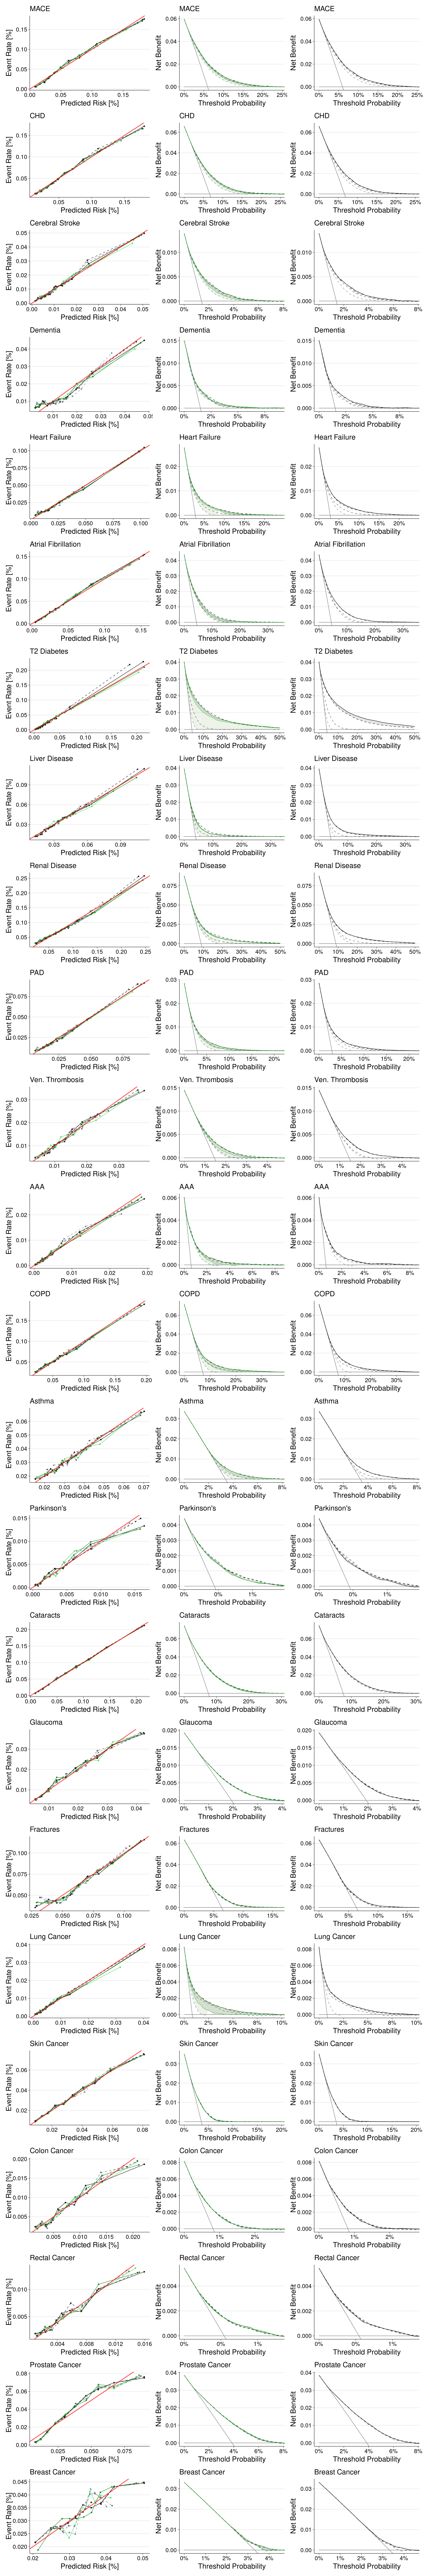

In [44]:
fig5 = (fig5_cal | fig5_dca) +  plot_layout(widths = c(1, 2))
plot_width=8.25; plot_height=50; plot_dpi=320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_dpi)
fig5

In [ ]:
library(gt)
plot_name = "Figures_5_ABC_ClinicalUtility"
fig5 %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device=cairo_pdf, width=plot_width, height=plot_height, dpi=plot_dpi)

In [25]:
library(gt)
plot_name = "Figures_5_AB_ClinicalUtility"
fig5 %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device=cairo_pdf, width=plot_width, height=plot_height, dpi=plot_dpi)

Warning message:
“Removed 152 row(s) containing missing values (geom_path).”
Warning message:
“Removed 242 row(s) containing missing values (geom_path).”
Warning message:
“Removed 86 row(s) containing missing values (geom_path).”


In [1]:
plotsA

ERROR: Error in eval(expr, envir, enclos): object 'plotsA' not found


In [35]:
endpoint = endpoint_order[1]

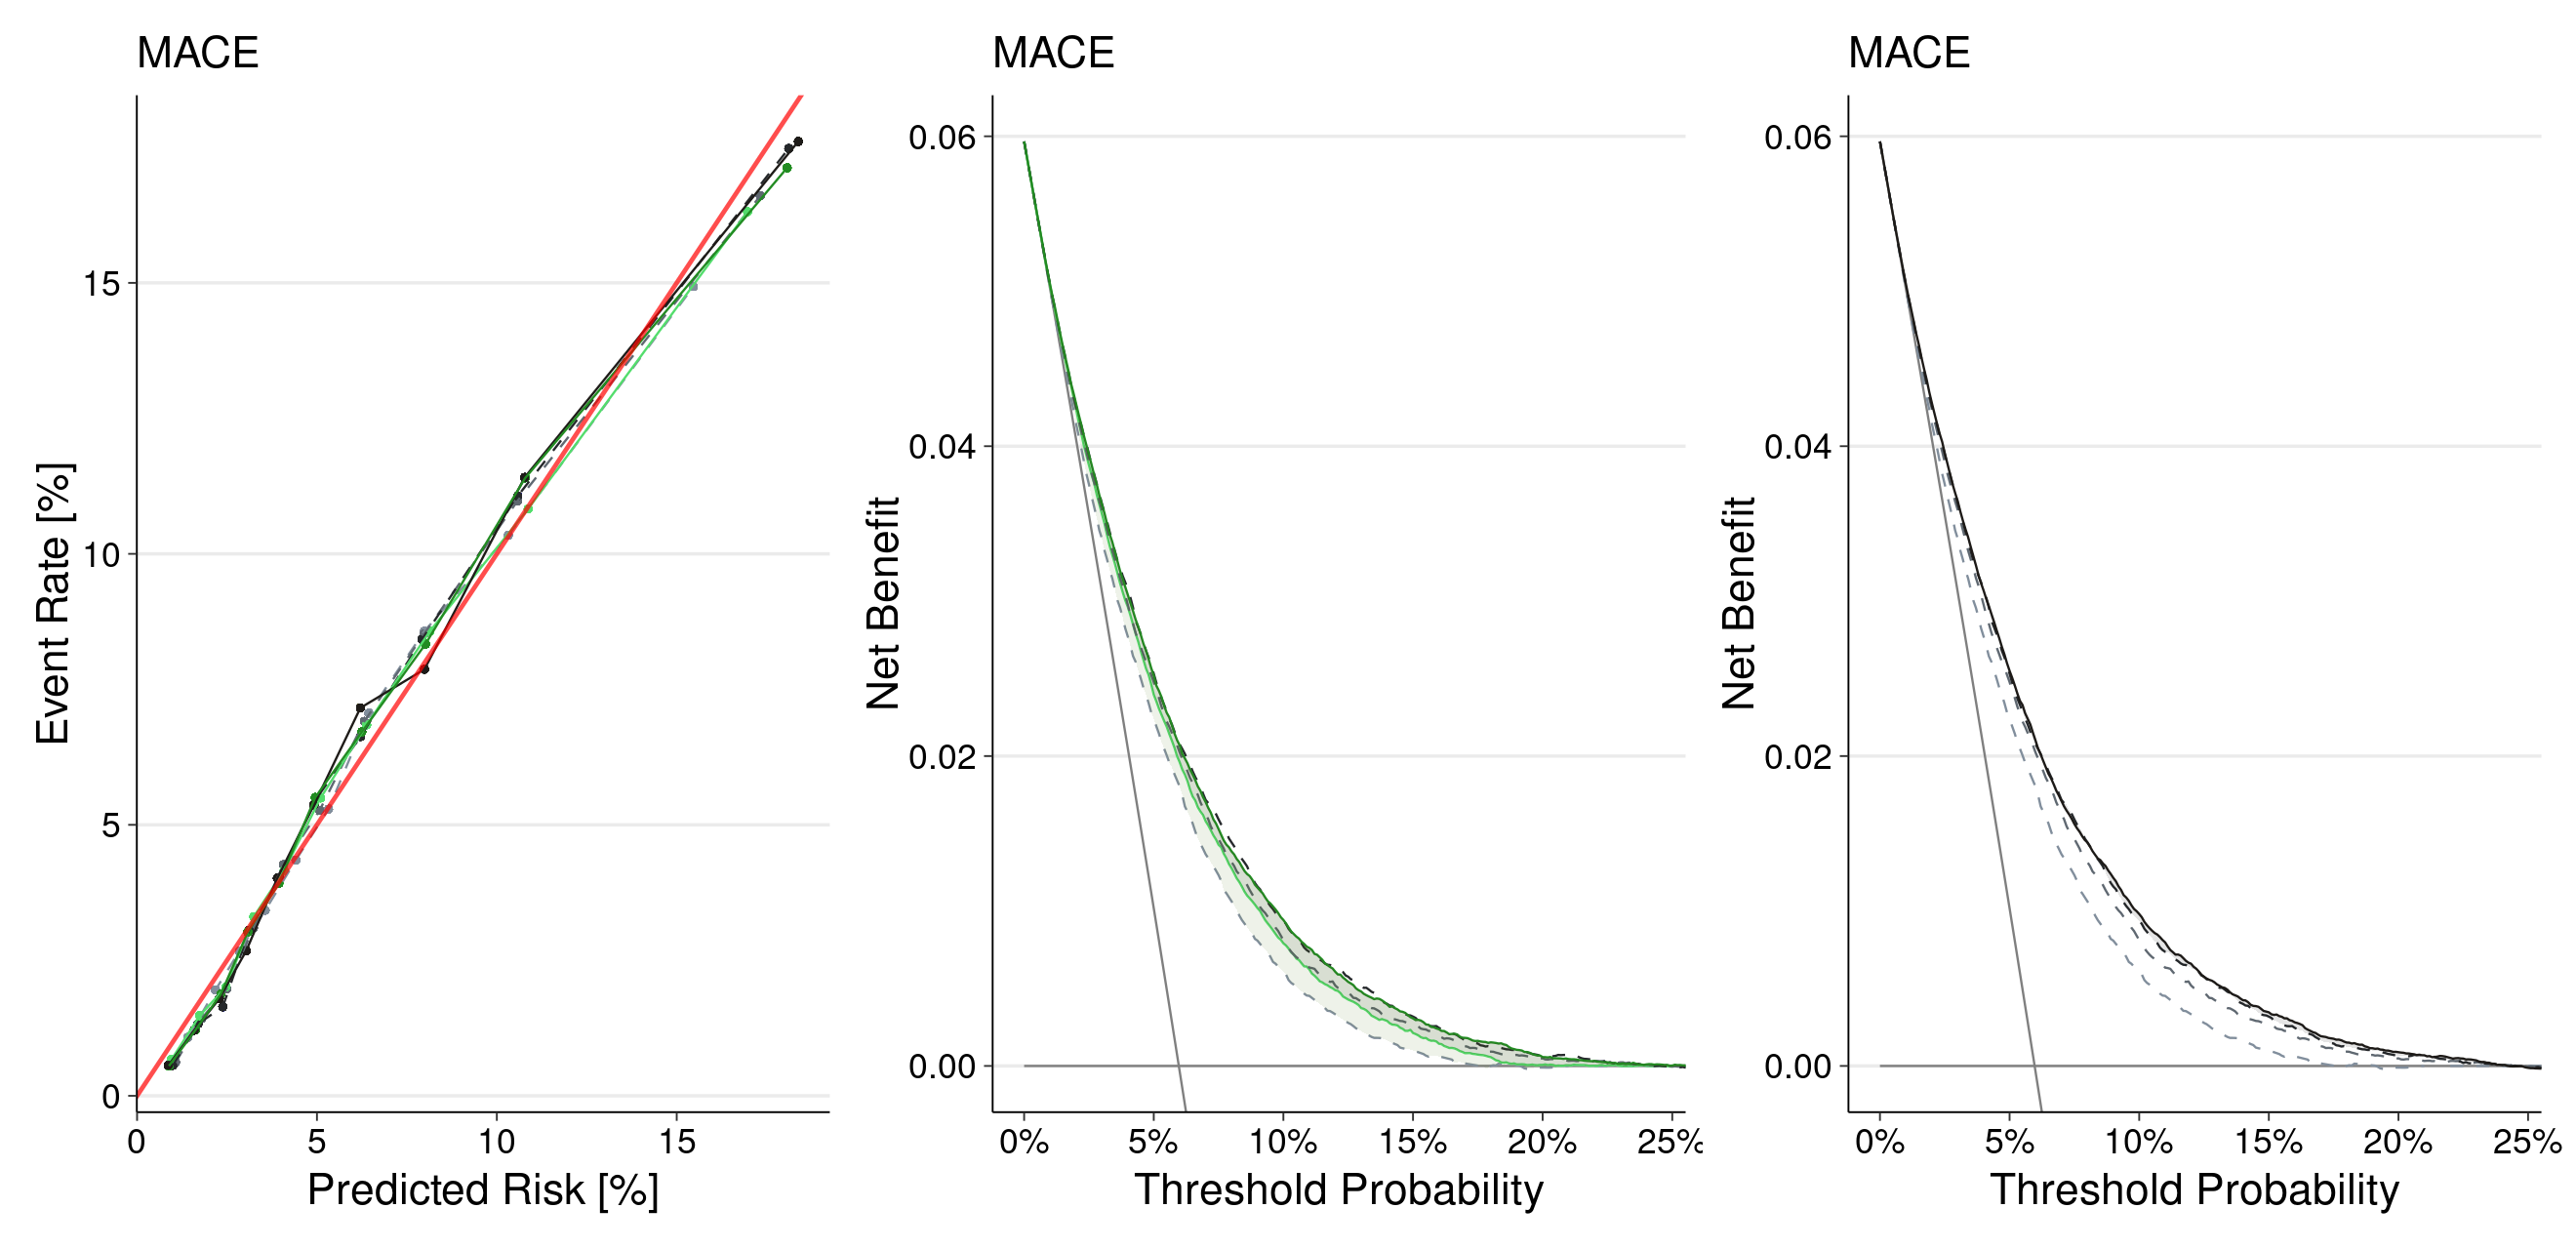

In [ ]:
zip <- function(...) {
  mapply(list, ..., SIMPLIFY = TRUE)
}
plots = zip(plotsA, plotsB)
fig5_dca = wrap_plots(plots, ncol=2)
plot_width=5; plot_height=50; plot_dpi=320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_dpi)